In [2]:
import os
import random
import numpy as np
from io import BytesIO

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from ipywidgets import widgets

/Users/sstonn/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
BASE_DIR = "./datasets/rock-paper-scissor/train"

rock_dir = os.path.join(BASE_DIR, 'rock')
paper_dir = os.path.join(BASE_DIR, 'paper')
scissors_dir = os.path.join(BASE_DIR, 'scissors')

print(f'total training rock images: {len(os.listdir(rock_dir))}')
print(f'total training paper images: {len(os.listdir(paper_dir))}')
print(f'total training scissors images: {len(os.listdir(scissors_dir))}')

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

print()
print(f"5 files in the rock subdir: {rock_files[:5]}")
print(f"5 files in the paper subdir: {paper_files[:5]}")
print(f"5 files in the scissors subdir: {scissors_files[:5]}")

total training rock images: 840
total training paper images: 840
total training scissors images: 840

5 files in the rock subdir: ['rock04-059.png', 'rock01-108.png', 'rock04-065.png', 'rock05ck01-067.png', 'rock05ck01-073.png']
5 files in the paper subdir: ['paper03-088.png', 'paper05-026.png', 'paper05-032.png', 'paper03-077.png', 'paper03-063.png']
5 files in the scissors subdir: ['testscissors03-040.png', 'testscissors03-054.png', 'testscissors03-068.png', 'testscissors03-083.png', 'testscissors03-097.png']


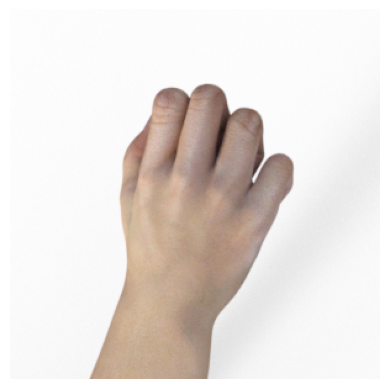

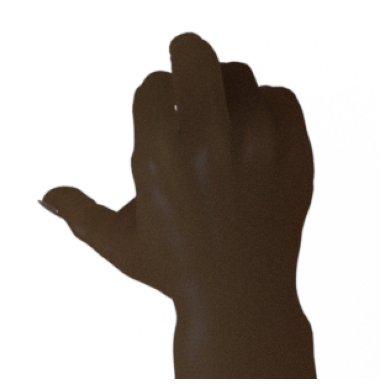

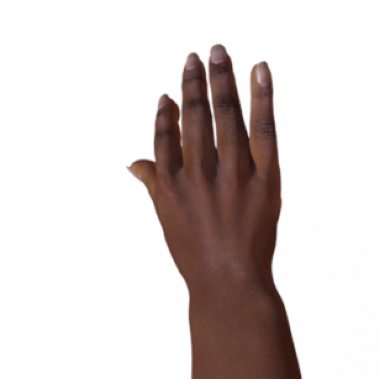

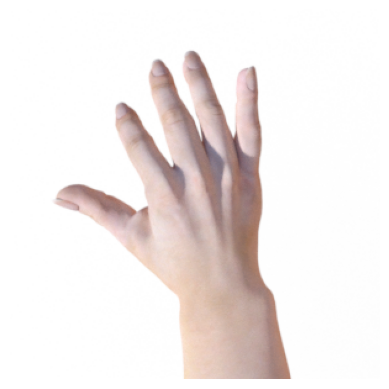

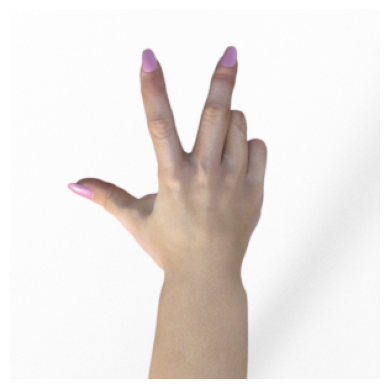

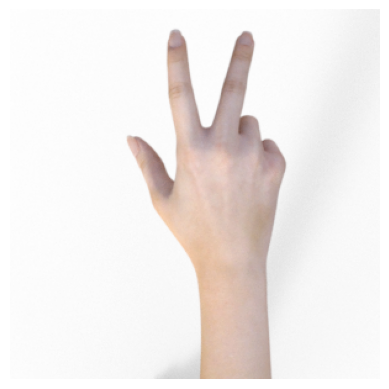

In [5]:
next_rock = [os.path.join(rock_dir, fname)
             for fname in random.sample(rock_files, k=2)]
next_paper = [os.path.join(paper_dir, fname)
              for fname in random.sample(paper_files, k=2)]
next_scissors = [os.path.join(scissors_dir, fname)
                 for fname in random.sample(scissors_files, k=2)]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.nn import relu, softmax

model = Sequential([
    Input(shape=(150, 150, 3)),
    Rescaling(1./255),
    Conv2D(64, (3, 3), activation=relu),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation=relu),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation=relu),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation=relu),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation=relu),
    Dense(3, activation=softmax)
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.utils import image_dataset_from_directory

TRAINING_DIR = "./datasets/rock-paper-scissor/train"
TEST_DIR = "./datasets/rock-paper-scissor/test"

train_dataset = image_dataset_from_directory(
    TRAINING_DIR,
    image_size=(150, 150),
    batch_size=32,
    label_mode="categorical"
)

test_dataset = image_dataset_from_directory(
    TEST_DIR,
    image_size=(150, 150),
    batch_size=32,
    label_mode="categorical"
)


SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(SHUFFLE_BUFFER_SIZE).prefetch(PREFETCH_BUFFER_SIZE)

test_dataset = test_dataset.cache().prefetch(PREFETCH_BUFFER_SIZE)

Found 2520 files belonging to 3 classes.
Found 372 files belonging to 3 classes.


In [10]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomTranslation, RandomContrast, RandomZoom

data_augmentation = Sequential([
    Input(shape=(150, 150, 3)),
    RandomFlip("horizontal"),
    RandomTranslation(0.2, 0.2),
    RandomRotation(0.4),
    RandomContrast(0.4),
    RandomZoom(0.2)
])

model_with_aug = model(data_augmentation)

ValueError: Only input tensors may be passed as positional arguments. The following argument value should be passed as a keyword argument: <Sequential name=sequential_1, built=True> (of type <class 'keras.src.models.sequential.Sequential'>)